# KNN Classification

###  Creating a KNN model manually (Without using scikit-learn) 

In [1]:
import numpy as np 
from collections import Counter
import pandas as pd

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return dist

def knn_predict(dataset, labels, test, k):
    distance = []
    for i in range (len(dataset)):
        dist = euclidean_distance(dataset[i], test)
        distance.append((dist, labels[i]))
    distance.sort(key=lambda x: x[0])
    neighbours = distance[:k]
    labels_only = [label for _,label in neighbours]
    return Counter(labels_only).most_common(1)[0][0]

df = pd.read_json(r"D:\PYTON PROGRAMMING\PYTHON FILES\Scikit-Learn\Week_1_Basics\Student Performance.json")
print(df)
print()
prediction = knn_predict(df['training_data'].tolist(), df['training_labels'].tolist(), [3, 5], 1)
print(prediction)


  training_data training_labels
0        [2, 9]            Fail
1        [1, 5]            Fail
2        [3, 6]            Pass
3        [4, 8]            Pass
4        [5, 5]            Pass

Pass


### Using Scikit-learn

# KNN Regression 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, f1_score


import warnings
warnings.filterwarnings("ignore") 

### Learn using synthetic dataset

In [ ]:
x, y = make_regression(n_samples=200, n_features = 1, noise = 0.1, random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)       # Splits the datasets into training sets (x_train, y_train) and test sets (x_test, y_test)
knn_regressor = KNeighborsRegressor(n_neighbors=5)     # Looks at 5 nearest neighbors

knn_regressor.fit(x_train, y_train)     # Fits the model with the training datasets
y_pred = knn_regressor.predict(x_test)      # Tests the model with testing datasets (x_test)

mse = mean_squared_error(y_test, y_pred)    # Calculates the average of the squares of the errors between the predicted value (y_predict) & actual output (y_test)
# - A lower MSE means your model is doing a better job.

r2 = r2_score(y_test, y_pred)   
print(mse)
print(r2)
print()
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.title('KNN Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

133.62045142000457
0.9817384115764595


## Linear Regression 

In [65]:
from sklearn.linear_model import LinearRegression
data = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Scikit-Learn\Week_1_Basics\csv\advertising.csv")

#### MATH


In [ ]:
def gradient_descent(x, y):
    m_cost = b_cost = 0
    iteration = 10000
    learning_rate = 0.01
    for i in range (iteration):
        y_pred = (m_cost * x) + b_cost
        cost = (1 / len_x) * sum([val**2 for val in (y - y_pred)])
        dm = -(2 / len_x) * sum(x * (y - y_pred))
        db = -(2 / len_x) * sum(y - y_pred)
        m_cost = m_cost - learning_rate * dm
        b_cost = b_cost - learning_rate * db
        print(f"iteration : {i}, cost : {cost}, m_cost : {m_cost}, b_cost : {b_cost}")        # Prints the iteration, cost, m_cost & b_cost for each iteration (i, cost, m_cost, b_cost)
                                  
x = data['TV'].to_numpy().reshape(-1, 1)
rows, cols = x.shape
len_x = rows
y = data['Sales'].to_numpy().reshape(-1, 1)
gradient_descent(x, y)


#### CODE 

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']].to_numpy()
Y = data['Sales'].to_numpy()

model = LinearRegression()
model.fit(X, Y)

# Predict for the entire dataset
all_preds = model.predict(X)
r2 = r2_score(Y, all_preds)

# Predict for a specific input
predicted_score = model.predict([[230.1, 37.8, 69.2]])

print(f"R² Score for model: {r2:.4f}")
print(f"Predicted Sales for [TV=230.1, Radio=37.8, Newspaper=69.2]: {predicted_score[0]:.2f}")

R² Score for model: 0.9026
Predicted Sales for [TV=230.1, Radio=37.8, Newspaper=69.2]: 21.22


#### GRAPH 

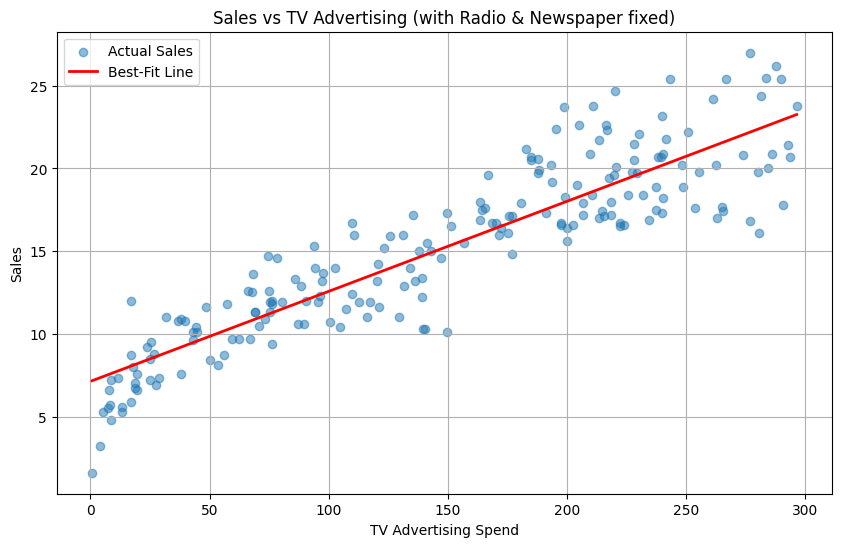

In [47]:
# How the advertising on TV affects the sales
radio_mean = data['Radio'].mean()
newspaper_mean = data['Newspaper'].mean()
tv_range = np.linspace(data['TV'].min(), data['TV'].max(), 100)
X_tv = np.column_stack([
    tv_range,
    np.full(100, radio_mean),
    np.full(100, newspaper_mean)
])
sales_preds = model.predict(X_tv)

plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(data['TV'], data['Sales'], alpha=0.5, label='Actual Sales')

# Plot best-fit line (predicted sales from varying TV values)
plt.plot(tv_range, sales_preds, color='red', linewidth=2, label='Best-Fit Line')

plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Sales vs TV Advertising (with Radio & Newspaper fixed)")
plt.legend()
plt.grid(True)
plt.show()

##### Residual plot 

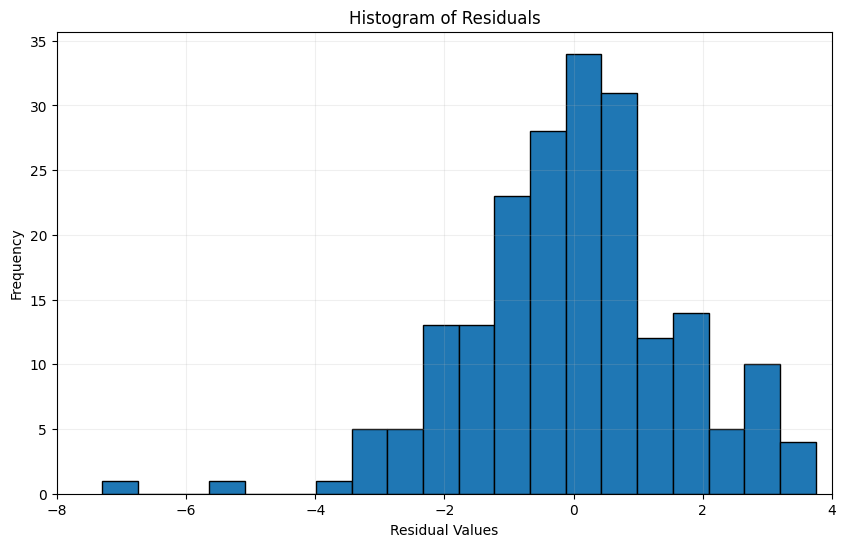

In [62]:
residual = data['Sales'] - all_preds
plt.figure(figsize=(10, 6))
plt.hist(residual, bins=20, edgecolor='black')
plt.xlim(-8,4)
plt.title("Histogram of Residuals")
plt.ylabel("Frequency")
plt.xlabel("Residual Values")
plt.grid(True, alpha = 0.2)
plt.show()

## Lasso And Ridge Regression 

In [68]:
from sklearn.linear_model import Ridge, Lasso

X = data[['TV', 'Radio', 'Newspaper']].to_numpy()
Y = data['Sales']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 42) 

# Regular  Linear Regression 
model = LinearRegression()
model.fit(train_X, train_Y)
linear_preds = model.predict(test_X)
linear_r2 = r2_score(test_Y, linear_preds)
print(f"Regular Linear Regression R2 Score: {linear_r2:.6f}")

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(train_X, train_Y)
ridge_preds = ridge_model.predict(test_X)
ridge_r2 = r2_score(test_Y, ridge_preds)
print(f"Ridge Regression R2 Score: {ridge_r2:.6f}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(train_X, train_Y)
lasso_preds = lasso_model.predict(test_X)
lasso_r2 = r2_score(test_Y, lasso_preds)
print(f"Lasso Regression R2 Score: {lasso_r2:.6f}")


Regular Linear Regression R2 Score: 0.909148
Ridge Regression R2 Score: 0.909148
Lasso Regression R2 Score: 0.909214
